In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train['traintest'] = 'train'
test = pd.read_csv('test.csv')
test['traintest'] = 'test'
train = train.rename(columns={"AnimalID": "ID"})
data = pd.concat([train.drop(['OutcomeSubtype'],axis=1),test])

In [3]:
data.head()

,AgeuponOutcome,AnimalType,Breed,Color,DateTime,ID,Name,OutcomeType,SexuponOutcome,traintest
0,1 year,Dog,Shetland Sheepdog Mix,Brown/White,2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,Neutered Male,train
1,1 year,Cat,Domestic Shorthair Mix,Cream Tabby,2013-10-13 12:44:00,A656520,Emily,Euthanasia,Spayed Female,train
2,2 years,Dog,Pit Bull Mix,Blue/White,2015-01-31 12:28:00,A686464,Pearce,Adoption,Neutered Male,train
3,3 weeks,Cat,Domestic Shorthair Mix,Blue Cream,2014-07-11 19:09:00,A683430,NaN,Transfer,Intact Male,train
4,2 years,Dog,Lhasa Apso/Miniature Poodle,Tan,2013-11-15 12:52:00,A667013,NaN,Transfer,Neutered Male,train


In [4]:
print train.shape
print test.shape

(26729, 11)
(11456, 9)


In [5]:
data['Color'].value_counts().head()

Black/White          4043
Black                3265
Brown Tabby          2359
Brown Tabby/White    1333
White                1333
Name: Color, dtype: int64

In [6]:
data['Breed'].value_counts().head()

Domestic Shorthair Mix      12587
Pit Bull Mix                 2776
Chihuahua Shorthair Mix      2498
Labrador Retriever Mix       1949
Domestic Medium Hair Mix     1217
Name: Breed, dtype: int64

In [7]:
#explore SexuponOutcome feature
catsex = data[data['AnimalType']=='Cat']['SexuponOutcome'].value_counts()
catsex.index.name ='cat'
dogsex = data[data['AnimalType']=='Dog']['SexuponOutcome'].value_counts()
dogsex.index.name ='dog'
print catsex
print dogsex

cat
Neutered Male    4457
Spayed Female    4320
Intact Female    3002
Intact Male      2718
Unknown          1437
Name: SexuponOutcome, dtype: int64
dog
Neutered Male    9557
Spayed Female    8313
Intact Male      2267
Intact Female    2002
Unknown           111
Name: SexuponOutcome, dtype: int64


# visualization

In [8]:
import seaborn as sns
ax = sns.countplot(train.AnimalType, palette=sns.color_palette("muted"))
#plt.savefig('animalcount.png')

ImportError: No module named seaborn

In [ ]:
plotdata = train[['AnimalType','OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby(['AnimalType','OutcomeType']).count()


In [ ]:
plt.figure(figsize=(10,4))
v = plotdata
plt.subplot(1, 2, 1)
plt.title('Cat')
plt.xlabel('group by outcometype')
plt.ylabel('rate')
sum_of = v.loc['Cat'].sum()
plt.xlim([-0.5,4.5])
plt1 = plt.bar(1, v.loc['Cat']['count'][0]/sum_of, 0.5,color='#5A8F29')
plt2 = plt.bar(1, np.array(v.loc['Cat'])[1]/sum_of, 0.5,color='k',bottom = np.sum(np.array(v.loc['Cat'])[:1])/sum_of)
plt3 = plt.bar(1, np.array(v.loc['Cat'])[2]/sum_of, 0.5,color='#FF8F00',bottom = np.sum(np.array(v.loc['Cat'])[:2])/sum_of)
plt4 = plt.bar(1, np.array(v.loc['Cat'])[3]/sum_of, 0.5,color='#FFF5EE',bottom = np.sum(np.array(v.loc['Cat'])[:3])/sum_of)
plt5 = plt.bar(1, np.array(v.loc['Cat'])[4]/sum_of, 0.5,color='#3C7DC4',bottom = np.sum(np.array(v.loc['Cat'])[:4])/sum_of)
plt.legend([plt1,plt2,plt3,plt4,plt5],['Adoption','Died','Euthanasia','Return_to_owner','Transfer'],loc=4,fontsize=10)

plt.subplot(1, 2, 2)
plt.title('Dog')
plt.xlabel('group by outcometype')
plt.ylabel('rate')
sum_of = v.loc['Dog'].sum()
plt.xlim([-0.5,4.5])
plt1 = plt.bar(1, v.loc['Dog']['count'][0]/sum_of, 0.5,color='#5A8F29')
plt2 = plt.bar(1, np.array(v.loc['Dog'])[1]/sum_of, 0.5,color='k',bottom = np.sum(np.array(v.loc['Dog'])[:1])/sum_of)
plt3 = plt.bar(1, np.array(v.loc['Dog'])[2]/sum_of, 0.5,color='#FF8F00',bottom = np.sum(np.array(v.loc['Dog'])[:2])/sum_of)
plt4 = plt.bar(1, np.array(v.loc['Dog'])[3]/sum_of, 0.5,color='#FFF5EE',bottom = np.sum(np.array(v.loc['Dog'])[:3])/sum_of)
plt5 = plt.bar(1, np.array(v.loc['Dog'])[4]/sum_of, 0.5,color='#3C7DC4',bottom = np.sum(np.array(v.loc['Dog'])[:4])/sum_of)
plt.legend([plt1,plt2,plt3,plt4,plt5],['Adoption','Died','Euthanasia','Return_to_owner','Transfer'],loc=4,fontsize=10)
#plt.savefig('gender-vs-outcome.png',dpi=150)

In [ ]:
plotdata = train[['SexuponOutcome','OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby(['SexuponOutcome','OutcomeType']).count()
sumtype = {}
for i in plotdata.index.levels[0]:
    sumtype[i] = plotdata.loc[i]['count'].sum() 
l = []
for i in range(len(plotdata)):
    l.append(float(plotdata['count'][i])/sumtype[plotdata.reset_index(['SexuponOutcome','OutcomeType'])['SexuponOutcome'][i]])
plotdata['rate'] = l
v = plotdata.reset_index(['OutcomeType','SexuponOutcome'])
sns.barplot(x="SexuponOutcome", y="rate", hue="OutcomeType", data=v)
#plt.savefig('sexuponoutcomecount.png')

# data preprocessing

In [40]:
import datetime
def timeofday(i):
    i = i.split(' ')[1]
    hour = int(i.split(':')[0])
    if hour >=6 and hour < 12:
        return ('morning')
    elif hour >=12 and hour < 18:
        return ('noon')
    elif hour >=18 and hour < 24:
        return ('night')
    elif hour < 6:
        return ('midnight')

In [41]:
#data['timeofday'] = data['DateTime'].apply(lambda x: timeofday(x))
data['year'] = data['DateTime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").year)
data['month'] = data['DateTime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month)
data['day'] = data['DateTime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)
data['weekday'] = data['DateTime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday())
data['hour'] = data['DateTime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour)

In [42]:
len(data[data['AgeuponOutcome'].isnull()])

24

In [43]:
def age_to_days(i):
    try:
        if 'year' in i:
            year = int(i.split(' ')[0])
            return year*365
        elif 'month' in i:
            month = int(i.split(' ')[0])
            return (month*30)
        elif 'week' in i:
            week = int(i.split(' ')[0])
            return (week*7)
        elif 'day' in i:
            day = int(i.split(' ')[0])
            return (day)
    except:
        return 0

In [44]:
data['age'] = data['AgeuponOutcome'].map(age_to_days)

In [45]:
def sex(x):
    try:
        if 'Female' in x:
            return 'Female'
        else:
            return 'Male'
    except:
        return 'Male'
data['sex'] = data['SexuponOutcome'].map(sex)

In [46]:
def intact(x):
    try:
        if 'Intact' in x:
            return 'Intact'
        elif 'Neutered' in x:
            return 'Neutered'
        elif 'Spayed' in x:
            return 'Spayed'
    except:
        return 'Unknown'
data['intact'] = data['SexuponOutcome'].map(intact)

In [47]:
def named(i):
    if type(i) == float:
        return 'unnamed'
    else:
        return 'named'
data['named'] = data['Name'].map(named)

# find unique breeds and uinque colors

In [48]:
#change data['Breed'] == ‘Miniature’ to ‘MMiniature’

In [49]:
def changeminiature(x):
    if 'Miniature' in x:
        return x.replace('Miniature','MMiniature')
    else:
        return x

In [50]:
data['Breed'] = data['Breed'].map(changeminiature)

In [51]:
import string
breedunique = []
for i in data['Breed'].unique():
    i = str(i)
    if 'Mix' in i:
        breedunique.append(i.split('Mi')[0].strip(' '))
        breedunique.append(i.split('Mi')[1])
    elif '/' in i:
        breedunique.append(i.split('/')[0].strip(' '))
        breedunique.append(i.split('/')[1].strip(' '))
    else:
        breedunique.append(i)

In [52]:
breedunique = list(set(breedunique))

In [53]:
breedunique[breedunique.index('x')] = 'Mix'

In [54]:
for i in breedunique:
    data[i] = data['Breed'].apply(lambda x: i in x)

In [55]:
def mix(x):
    if 'Mix' in x or '/' in x:
        return 'mixed'
    else:
        return 'pure'


In [56]:
data['breedmix'] = data['Breed'].map(mix)

In [57]:
colorunique = []
for i in data['Color'].unique():
    i = str(i)
    if '/' in i:
        colorunique.append(i.split('/')[0].strip(' '))
        colorunique.append(i.split('/')[1].strip(' '))
    else:
        colorunique.append(i)

In [58]:
colorunique = list(set(colorunique))

In [59]:
for i in colorunique:
    data[i] = data['Color'].apply(lambda x: i in x)

In [60]:
data['colormix'] = data['Color'].map(mix)

In [61]:
target = data['OutcomeType'].dropna()
datamodel = data.drop(['AgeuponOutcome','Breed','Color','DateTime','ID','Name','OutcomeType','SexuponOutcome'],axis=1)

#labelencoder fit_transform

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
changelist = [u'AnimalType',u'year', u'month', u'day',
       u'weekday', u'hour',u'sex', u'intact', u'named','breedmix','colormix']
for i in changelist:
    datamodel[i] = le.fit_transform(datamodel[i])

In [63]:
train = datamodel[datamodel['traintest'] == 'train'].drop(['traintest'],axis=1)
test = datamodel[datamodel['traintest'] == 'test'].drop(['traintest'],axis=1)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(train, target) 

In [64]:
data[['Breed','Color','breedmix','colormix']]

,Breed,Color,breedmix,colormix
0,Shetland Sheepdog Mix,Brown/White,mixed,mixed
1,Domestic Shorthair Mix,Cream Tabby,mixed,pure
2,Pit Bull Mix,Blue/White,mixed,mixed
3,Domestic Shorthair Mix,Blue Cream,mixed,pure
4,Lhasa Apso/MMMiniature Poodle,Tan,mixed,pure
5,Cairn Terrier/Chihuahua Shorthair,Black/Tan,mixed,mixed
6,Domestic Shorthair Mix,Blue Tabby,mixed,pure
7,Domestic Shorthair Mix,Brown Tabby,mixed,pure
8,American Pit Bull Terrier Mix,Red/White,mixed,mixed
9,Cairn Terrier,White,pure,pure


In [65]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
X = train
y = target
y = le.fit_transform(y)
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
import xgboost as xgb

In [67]:
def model(features):
    xg_train = xgb.DMatrix(train_X[features], label=train_Y)
    xg_test = xgb.DMatrix(test_X[features],label=test_Y)
    param = {}
    # use softmax multi-class classification
    param['objective'] = 'multi:softprob'
    # scale weight of positive examples
    param['eta'] = 0.2
    param['max_depth'] = 8
    param['silent'] = 1
    param['nthread'] = 4
    param['num_class'] = 5
    param['eval_metric'] = 'mlogloss'
    param['subsample']=0.8
    param['colsample_bytree']=0.85
    param['verbose'] = False
    param['early_stopping_rounds'] = 5
    watchlist = [(xg_train,'train'),(xg_test,'test')]
    num_round = 100
    
    evals_result = {}
    bst = xgb.train(param,xg_train, num_round, watchlist,evals_result=evals_result,early_stopping_rounds=10)
    
    return features, evals_result
# Note: this convention has been changed since xgboost-unity
# get prediction, this is in 1D array, need reshape to (ndata, nclass)
# yprob = bst.predict(xgb.DMatrix(test),ntree_limit=bst.best_ntree_limit)

In [68]:
features1 = train.columns
feature1, evals_result1 = model(features1)

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.404565	test-mlogloss:1.411393
[1]	train-mlogloss:1.256774	test-mlogloss:1.273207
[2]	train-mlogloss:1.144687	test-mlogloss:1.168748
[3]	train-mlogloss:1.060693	test-mlogloss:1.093264
[4]	train-mlogloss:0.990052	test-mlogloss:1.030748
[5]	train-mlogloss:0.932284	test-mlogloss:0.980777
[6]	train-mlogloss:0.886480	test-mlogloss:0.940359
[7]	train-mlogloss:0.850717	test-mlogloss:0.910196
[8]	train-mlogloss:0.818633	test-mlogloss:0.884546
[9]	train-mlogloss:0.790941	test-mlogloss:0.862966
[10]	train-mlogloss:0.769479	test-mlogloss:0.845595
[11]	train-mlogloss:0.747116	test-mlogloss:0.829670
[12]	train-mlogloss:0.730131	test-mlogloss:0.817720
[13]	train-mlogloss:0.713501	test-mlogloss:0.806624
[14]	train-mlogloss:0.698888	test-mlogloss:0.796746
[15]	train-mlogloss:0.686172	test-mlogloss:0.789713
[16]	train-mlogloss:0.674353	test-mlogloss:0.782949
[17]	train-mlogloss:0.664539	test-mlogloss:0.777856
[18]	train-mlog

In [69]:
# Breed:Method1  Color:Method1
features2 = train.columns.drop(['breedmix','colormix'])
feature2, evals_result2 = model(features2)


Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.402573	test-mlogloss:1.410987
[1]	train-mlogloss:1.272256	test-mlogloss:1.291815
[2]	train-mlogloss:1.153092	test-mlogloss:1.182459
[3]	train-mlogloss:1.064323	test-mlogloss:1.101032
[4]	train-mlogloss:0.991731	test-mlogloss:1.035671
[5]	train-mlogloss:0.937279	test-mlogloss:0.987672
[6]	train-mlogloss:0.890119	test-mlogloss:0.946466
[7]	train-mlogloss:0.851302	test-mlogloss:0.914023
[8]	train-mlogloss:0.818073	test-mlogloss:0.887705
[9]	train-mlogloss:0.793637	test-mlogloss:0.868354
[10]	train-mlogloss:0.768720	test-mlogloss:0.849780
[11]	train-mlogloss:0.747541	test-mlogloss:0.834299
[12]	train-mlogloss:0.727852	test-mlogloss:0.820783
[13]	train-mlogloss:0.711544	test-mlogloss:0.809856
[14]	train-mlogloss:0.698326	test-mlogloss:0.801237
[15]	train-mlogloss:0.684051	test-mlogloss:0.792343
[16]	train-mlogloss:0.672017	test-mlogloss:0.785209
[17]	train-mlogloss:0.661774	test-mlogloss:0.779519
[18]	train-mlog

In [38]:
#columns breedmix is created after getting dummy variables of breed unique type, and thus if we can find index of breedmix
#we know where to drop train.columns
list(train.columns).index('breedmix')

255

In [39]:
# Breed:Method2  Color:Method1
features3 = train.columns.drop(train.columns[11:255]).drop('colormix')
feature3, evals_result3 = model(features3)


Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.400648	test-mlogloss:1.409438
[1]	train-mlogloss:1.249022	test-mlogloss:1.266810
[2]	train-mlogloss:1.137994	test-mlogloss:1.165017
[3]	train-mlogloss:1.053045	test-mlogloss:1.086635
[4]	train-mlogloss:0.986523	test-mlogloss:1.026521
[5]	train-mlogloss:0.934888	test-mlogloss:0.981500
[6]	train-mlogloss:0.891060	test-mlogloss:0.943532
[7]	train-mlogloss:0.854775	test-mlogloss:0.913327
[8]	train-mlogloss:0.821743	test-mlogloss:0.887076
[9]	train-mlogloss:0.795376	test-mlogloss:0.866666
[10]	train-mlogloss:0.773439	test-mlogloss:0.850558
[11]	train-mlogloss:0.752474	test-mlogloss:0.834942
[12]	train-mlogloss:0.734149	test-mlogloss:0.822881
[13]	train-mlogloss:0.717361	test-mlogloss:0.812276
[14]	train-mlogloss:0.703435	test-mlogloss:0.804001
[15]	train-mlogloss:0.689628	test-mlogloss:0.796298
[16]	train-mlogloss:0.678287	test-mlogloss:0.790089
[17]	train-mlogloss:0.667865	test-mlogloss:0.784326
[18]	train-mlog

In [40]:
# Breed:Method1  Color:Method2
features4 = train.columns.drop(train.columns[255:-1])
feature4, evals_result4 = model(features3)


Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.400648	test-mlogloss:1.409438
[1]	train-mlogloss:1.249022	test-mlogloss:1.266810
[2]	train-mlogloss:1.137994	test-mlogloss:1.165017
[3]	train-mlogloss:1.053045	test-mlogloss:1.086635
[4]	train-mlogloss:0.986523	test-mlogloss:1.026521
[5]	train-mlogloss:0.934888	test-mlogloss:0.981500
[6]	train-mlogloss:0.891060	test-mlogloss:0.943532
[7]	train-mlogloss:0.854775	test-mlogloss:0.913327
[8]	train-mlogloss:0.821743	test-mlogloss:0.887076
[9]	train-mlogloss:0.795376	test-mlogloss:0.866666
[10]	train-mlogloss:0.773439	test-mlogloss:0.850558
[11]	train-mlogloss:0.752474	test-mlogloss:0.834942
[12]	train-mlogloss:0.734149	test-mlogloss:0.822881
[13]	train-mlogloss:0.717361	test-mlogloss:0.812276
[14]	train-mlogloss:0.703435	test-mlogloss:0.804001
[15]	train-mlogloss:0.689628	test-mlogloss:0.796298
[16]	train-mlogloss:0.678287	test-mlogloss:0.790089
[17]	train-mlogloss:0.667865	test-mlogloss:0.784326
[18]	train-mlog

In [41]:
# Breed:Method2  Color:Method2
features5 = train.columns.drop(train.columns[10:255]).drop(train.columns[256:-1])
feature5, evals_result5 = model(features5)


Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.401141	test-mlogloss:1.409899
[1]	train-mlogloss:1.260072	test-mlogloss:1.277046
[2]	train-mlogloss:1.150608	test-mlogloss:1.174741
[3]	train-mlogloss:1.063729	test-mlogloss:1.095013
[4]	train-mlogloss:0.995190	test-mlogloss:1.034317
[5]	train-mlogloss:0.939074	test-mlogloss:0.984816
[6]	train-mlogloss:0.892903	test-mlogloss:0.945363
[7]	train-mlogloss:0.855864	test-mlogloss:0.913440
[8]	train-mlogloss:0.824389	test-mlogloss:0.887511
[9]	train-mlogloss:0.796684	test-mlogloss:0.865709
[10]	train-mlogloss:0.774033	test-mlogloss:0.849925
[11]	train-mlogloss:0.753173	test-mlogloss:0.834706
[12]	train-mlogloss:0.734685	test-mlogloss:0.822077
[13]	train-mlogloss:0.719072	test-mlogloss:0.811187
[14]	train-mlogloss:0.705283	test-mlogloss:0.802610
[15]	train-mlogloss:0.692481	test-mlogloss:0.794955
[16]	train-mlogloss:0.680790	test-mlogloss:0.790109
[17]	train-mlogloss:0.669159	test-mlogloss:0.783515
[18]	train-mlog

In [42]:
print '*'*40
print 'all columns'
print features1
print pd.Series(evals_result1['test']['mlogloss']).min()
print '*'*40
print 'Breed:Method1 Color：Method1'
print feature2
print pd.Series(evals_result2['test']['mlogloss']).min()
print '*'*40
print 'Breed:Method2 Color：Method1'
print feature3
print pd.Series(evals_result3['test']['mlogloss']).min()
print '*'*40
print 'Breed:Method1 Color：Method2'
print feature4
print pd.Series(evals_result4['test']['mlogloss']).min()
print '*'*40
print 'Breed:Method2 Color：Method2'
print feature5
print pd.Series(evals_result5['test']['mlogloss']).min()

****************************************
all columns
Index([u'AnimalType', u'year', u'month', u'day', u'weekday', u'hour', u'age',
       u'sex', u'intact', u'named',
       ...
       u'Blue Point', u'Gold', u'Tricolor', u'Calico Point', u'Yellow',
       u'Silver', u'Pink', u'Tan', u'Cream', u'colormix'],
      dtype='object', length=314)
0.74225
****************************************
Breed:Method1 Color：Method1
Index([u'AnimalType', u'year', u'month', u'day', u'weekday', u'hour', u'age',
       u'sex', u'intact', u'named',
       ...
       u'Brown Tabby', u'Blue Point', u'Gold', u'Tricolor', u'Calico Point',
       u'Yellow', u'Silver', u'Pink', u'Tan', u'Cream'],
      dtype='object', length=312)
0.73668
****************************************
Breed:Method2 Color：Method1
Index([u'AnimalType', u'year', u'month', u'day', u'weekday', u'hour', u'age',
       u'sex', u'intact', u'named', u'Pug', u'breedmix', u'Blue',
       u'Blue Tabby', u'Cream Tabby', u'Liver Tick', u'Flame Point

In [60]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import log_loss

In [73]:
xg_train = xgb.DMatrix(train_X[features2], label=train_Y)
xg_test = xgb.DMatrix(test_X[features2],label=test_Y)
param = {}
# use softprob multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.02
param['max_depth'] = 8
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 5
param['eval_metric'] = 'mlogloss'
param['subsample']=0.8
param['colsample_bytree']=0.85
param['verbose'] = False
param['early_stopping_rounds'] = 10
watchlist = [(xg_train,'train'),(xg_test,'test')]
num_round = 500

evals_result = {}
bst = xgb.train(param,xg_train, num_round, watchlist,evals_result=evals_result,early_stopping_rounds=10)

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.588607	test-mlogloss:1.589624
[1]	train-mlogloss:1.567730	test-mlogloss:1.569731
[2]	train-mlogloss:1.546332	test-mlogloss:1.549197
[3]	train-mlogloss:1.526305	test-mlogloss:1.530061
[4]	train-mlogloss:1.506585	test-mlogloss:1.511090
[5]	train-mlogloss:1.486809	test-mlogloss:1.492206
[6]	train-mlogloss:1.468094	test-mlogloss:1.474443
[7]	train-mlogloss:1.450884	test-mlogloss:1.458165
[8]	train-mlogloss:1.434145	test-mlogloss:1.442362
[9]	train-mlogloss:1.417378	test-mlogloss:1.426348
[10]	train-mlogloss:1.401037	test-mlogloss:1.410824
[11]	train-mlogloss:1.385645	test-mlogloss:1.396170
[12]	train-mlogloss:1.371248	test-mlogloss:1.382652
[13]	train-mlogloss:1.359422	test-mlogloss:1.371720
[14]	train-mlogloss:1.344548	test-mlogloss:1.357776
[15]	train-mlogloss:1.330523	test-mlogloss:1.344692
[16]	train-mlogloss:1.317167	test-mlogloss:1.332233
[17]	train-mlogloss:1.304518	test-mlogloss:1.320327
[18]	train-mlog

In [74]:
xg_train = xgb.DMatrix(train_X[features2], label=train_Y)
xg_test = xgb.DMatrix(test_X[features2],label=test_Y)
param = {}
# use softprob multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.02
param['max_depth'] = 9
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 5
param['eval_metric'] = 'mlogloss'
param['subsample']=0.8
param['colsample_bytree']=0.85
param['verbose'] = False
param['early_stopping_rounds'] = 10
watchlist = [(xg_train,'train'),(xg_test,'test')]
num_round = 500

evals_result = {}
bst = xgb.train(param,xg_train, num_round, watchlist,evals_result=evals_result,early_stopping_rounds=10)

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.588004	test-mlogloss:1.589377
[1]	train-mlogloss:1.566557	test-mlogloss:1.569324
[2]	train-mlogloss:1.544618	test-mlogloss:1.548616
[3]	train-mlogloss:1.524068	test-mlogloss:1.529287
[4]	train-mlogloss:1.503805	test-mlogloss:1.510215
[5]	train-mlogloss:1.483522	test-mlogloss:1.491230
[6]	train-mlogloss:1.464330	test-mlogloss:1.473376
[7]	train-mlogloss:1.446642	test-mlogloss:1.456947
[8]	train-mlogloss:1.429281	test-mlogloss:1.440945
[9]	train-mlogloss:1.412081	test-mlogloss:1.424897
[10]	train-mlogloss:1.395285	test-mlogloss:1.409263
[11]	train-mlogloss:1.379517	test-mlogloss:1.394473
[12]	train-mlogloss:1.364610	test-mlogloss:1.380756
[13]	train-mlogloss:1.352367	test-mlogloss:1.369743
[14]	train-mlogloss:1.337071	test-mlogloss:1.355717
[15]	train-mlogloss:1.322659	test-mlogloss:1.342523
[16]	train-mlogloss:1.308826	test-mlogloss:1.329949
[17]	train-mlogloss:1.295778	test-mlogloss:1.317995
[18]	train-mlog

In [75]:
xg_train = xgb.DMatrix(train_X[features2], label=train_Y)
xg_test = xgb.DMatrix(test_X[features2],label=test_Y)
param = {}
# use softprob multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.02
param['max_depth'] = 10
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 5
param['eval_metric'] = 'mlogloss'
param['subsample']=0.8
param['colsample_bytree']=0.85
param['verbose'] = False
param['early_stopping_rounds'] = 10
watchlist = [(xg_train,'train'),(xg_test,'test')]
num_round = 500

evals_result = {}
bst = xgb.train(param,xg_train, num_round, watchlist,evals_result=evals_result,early_stopping_rounds=10)

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.587404	test-mlogloss:1.589292
[1]	train-mlogloss:1.565331	test-mlogloss:1.569083
[2]	train-mlogloss:1.542904	test-mlogloss:1.548233
[3]	train-mlogloss:1.521923	test-mlogloss:1.528859
[4]	train-mlogloss:1.501048	test-mlogloss:1.509659
[5]	train-mlogloss:1.480273	test-mlogloss:1.490553
[6]	train-mlogloss:1.460593	test-mlogloss:1.472608
[7]	train-mlogloss:1.442514	test-mlogloss:1.456121
[8]	train-mlogloss:1.424525	test-mlogloss:1.439960
[9]	train-mlogloss:1.406892	test-mlogloss:1.423834
[10]	train-mlogloss:1.389560	test-mlogloss:1.408179
[11]	train-mlogloss:1.373415	test-mlogloss:1.393304
[12]	train-mlogloss:1.357947	test-mlogloss:1.379400
[13]	train-mlogloss:1.345338	test-mlogloss:1.368372
[14]	train-mlogloss:1.329576	test-mlogloss:1.354247
[15]	train-mlogloss:1.314708	test-mlogloss:1.341057
[16]	train-mlogloss:1.300376	test-mlogloss:1.328458
[17]	train-mlogloss:1.286919	test-mlogloss:1.316458
[18]	train-mlog

In [71]:
xg_train = xgb.DMatrix(train_X[features2], label=train_Y)
xg_test = xgb.DMatrix(test_X[features2],label=test_Y)
param = {}
# use softprob multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.02
param['max_depth'] = 11
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 5
param['eval_metric'] = 'mlogloss'
param['subsample']=0.8
param['colsample_bytree']=0.85
param['verbose'] = False
param['early_stopping_rounds'] = 10
watchlist = [(xg_train,'train'),(xg_test,'test')]
num_round = 500

evals_result = {}
bst = xgb.train(param,xg_train, num_round, watchlist,evals_result=evals_result,early_stopping_rounds=10)


Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.586870	test-mlogloss:1.589295
[1]	train-mlogloss:1.564251	test-mlogloss:1.568994
[2]	train-mlogloss:1.541280	test-mlogloss:1.548110
[3]	train-mlogloss:1.519874	test-mlogloss:1.528626
[4]	train-mlogloss:1.498415	test-mlogloss:1.509468
[5]	train-mlogloss:1.477172	test-mlogloss:1.490293
[6]	train-mlogloss:1.457017	test-mlogloss:1.472318
[7]	train-mlogloss:1.438525	test-mlogloss:1.455756
[8]	train-mlogloss:1.419924	test-mlogloss:1.439512
[9]	train-mlogloss:1.401823	test-mlogloss:1.423207
[10]	train-mlogloss:1.384023	test-mlogloss:1.407452
[11]	train-mlogloss:1.367503	test-mlogloss:1.392517
[12]	train-mlogloss:1.351550	test-mlogloss:1.378525
[13]	train-mlogloss:1.338448	test-mlogloss:1.367429
[14]	train-mlogloss:1.322270	test-mlogloss:1.353252
[15]	train-mlogloss:1.306942	test-mlogloss:1.339979
[16]	train-mlogloss:1.292236	test-mlogloss:1.327335
[17]	train-mlogloss:1.278352	test-mlogloss:1.315251
[18]	train-mlog

param['max_depth'] = 11 is better than param['max_depth'] = 8

In [76]:
xg_train = xgb.DMatrix(train_X[features2], label=train_Y)
xg_test = xgb.DMatrix(test_X[features2],label=test_Y)
param = {}
# use softprob multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.02
param['max_depth'] = 12
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 5
param['eval_metric'] = 'mlogloss'
param['subsample']=0.8
param['colsample_bytree']=0.85
param['verbose'] = False
param['early_stopping_rounds'] = 10
watchlist = [(xg_train,'train'),(xg_test,'test')]
num_round = 500

evals_result = {}
bst = xgb.train(param,xg_train, num_round, watchlist,evals_result=evals_result,early_stopping_rounds=10)

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mlogloss:1.586324	test-mlogloss:1.589404
[1]	train-mlogloss:1.563178	test-mlogloss:1.569054
[2]	train-mlogloss:1.539743	test-mlogloss:1.548135
[3]	train-mlogloss:1.517931	test-mlogloss:1.528716
[4]	train-mlogloss:1.495965	test-mlogloss:1.509485
[5]	train-mlogloss:1.474271	test-mlogloss:1.490218
[6]	train-mlogloss:1.453607	test-mlogloss:1.472121
[7]	train-mlogloss:1.434659	test-mlogloss:1.455540
[8]	train-mlogloss:1.415489	test-mlogloss:1.439228
[9]	train-mlogloss:1.396891	test-mlogloss:1.422845
[10]	train-mlogloss:1.378596	test-mlogloss:1.406993
[11]	train-mlogloss:1.361714	test-mlogloss:1.392038
[12]	train-mlogloss:1.345233	test-mlogloss:1.378007
[13]	train-mlogloss:1.331699	test-mlogloss:1.366833
[14]	train-mlogloss:1.315111	test-mlogloss:1.352634
[15]	train-mlogloss:1.299324	test-mlogloss:1.339369
[16]	train-mlogloss:1.284150	test-mlogloss:1.326660
[17]	train-mlogloss:1.269851	test-mlogloss:1.314532
[18]	train-mlog

In [117]:
def predicttest(eta,num_round,early_stopping):
    #train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2)
    xg_train = xgb.DMatrix(train_X[features2], label=train_Y)
    xg_test = xgb.DMatrix(test_X[features2],label=test_Y)
    param = {}
    # use softprob multi-class classification
    param['objective'] = 'multi:softprob'
    # scale weight of positive examples
    param['eta'] = eta
    param['max_depth'] = 11
    param['silent'] = 1
    param['nthread'] = 4
    param['num_class'] = 5
    param['eval_metric'] = 'mlogloss'
    param['subsample']=0.8
    param['colsample_bytree']=0.85
    param['verbose'] = False
    #watchlist = [(xg_train,'train'),(xg_test,'test')]
    
    if early_stopping:
        bst = xgb.train(param,xg_train, num_round,early_stopping_rounds=10)
    if not early_stopping:
        bst = xgb.train(param,xg_train, num_round)
    yprob = bst.predict(xgb.DMatrix(test_X[features2]),ntree_limit=bst.best_ntree_limit)
    #calculate log_loss
    error = log_loss(test_Y,yprob)
    print error
    return error

In [118]:
predicttest(0.02,500,False)
predicttest(0.02,650,False)
predicttest(0.02,800,False)
predicttest(0.015,1000,False)
predicttest(0.02,700,False)
predicttest(0.01,1200,False)
predicttest(0.03,600,False)

0.728638158419
0.729241193615
0.731387227842
0.729956847003
0.729714966966
0.726803602467
0.734338238122


0.73433823812179555

In [109]:
model1 = []
model2 = []

In [115]:
for i in range(50):
    model1.append(predicttest(0.02,650,False))
    model2.append(predicttest(0.01,1200,False))

0.730134380918
0.745023445469
0.742539671233
0.730342020525
0.740604490209
0.721310638273
0.738687510825
0.73187375378
0.752374076882
0.717377567298
0.720222556662
0.722088113443
0.739808818924
0.737067673497
0.735832171027
0.748659296732
0.705457985164
0.743100738481
0.757496471078
0.72686213291
0.739663084372
0.72687829342
0.745584892635
0.749364747335
0.723790208026
0.732798759106
0.735069280017
0.72468965683
0.72252398626
0.748321391996
0.721214371119
0.735234292993
0.704369618492
0.763648453144
0.715562729187
0.75554268647
0.73732803066
0.743548204676
0.706467070631
0.721326514239


In [88]:
from scipy.stats import ttest_ind

In [119]:
print ttest_ind(model1, model2,equal_var=True)

Ttest_indResult(statistic=-3.0647963780112253, pvalue=0.0027937437371030193)


pvalue is 0.0 and the H0 can be rejected which means log loss of model1 is statistically different from model2.

In [101]:
def test(eta,num_round,early_stopping,filename):
    #xg_train = xgb.DMatrix(train_X[features2], label=train_Y)
    #xg_test = xgb.DMatrix(test_X[features2],label=test_Y)
    xg = xgb.DMatrix(X[features2],label=y)
    param = {}
    # use softprob multi-class classification
    param['objective'] = 'multi:softprob'
    # scale weight of positive examples
    param['eta'] = eta
    param['max_depth'] = 11
    param['silent'] = 1
    param['nthread'] = 4
    param['num_class'] = 5
    param['eval_metric'] = 'mlogloss'
    param['subsample']=0.8
    param['colsample_bytree']=0.85
    param['verbose'] = False
    watchlist = [(xg_train,'train'),(xg_test,'test')]
    #evals_result = {}
    if early_stopping:
        bst = xgb.train(param,xg, num_round,early_stopping_rounds=10)
    if not early_stopping:
        bst = xgb.train(param,xg, num_round)
    yprob = bst.predict(xgb.DMatrix(test[features2]),ntree_limit=bst.best_ntree_limit)
    submission = pd.DataFrame()
    submission["ID"] = test.index+1
    submission["Adoption"] = yprob[:, 0]
    submission["Died"] = yprob[:, 1]
    submission["Euthanasia"] = yprob[:, 2]
    submission["Return_to_owner"] = yprob[:, 3]
    submission["Transfer"] = yprob[:, 4]
    submission.to_csv(filename,index=False)

In [123]:
#test(0.02,500,False,'para2.csv')
#test(0.02,650,False,'para3.csv')
#test(0.02,800,False,'para4.csv')
#test(0.015,1000,False,'para5.csv')
#test(0.02,700,False,'para7.csv')
#test(0.01,1200,False,'para8.csv')
#test(0.03,600,False,'para9.csv')

In [190]:
import operator
importance = bst.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse = True)
top = importance[:10]

In [191]:
index = []
value = []
for i in top:
    index.append(i[0])
    value.append(i[1])

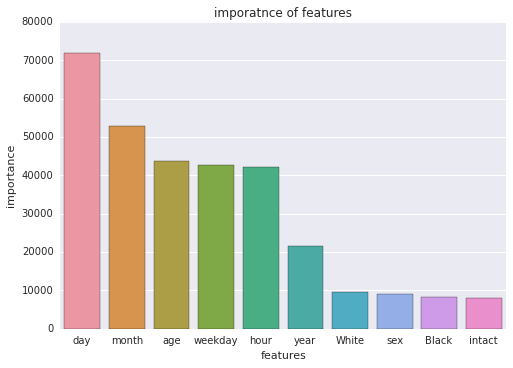

In [192]:
ax = sns.barplot(np.array(index), value)
ax.set_ylabel("importance")
ax.set_xlabel('features')
ax.set_title('imporatnce of features')
plt.savefig('importance of features.png')

In [186]:
importance[:15]

[('day', 71927),
 ('month', 52908),
 ('age', 43765),
 ('weekday', 42717),
 ('hour', 42225),
 ('year', 21518),
 ('White', 9694),
 ('sex', 8973),
 ('Black', 8251),
 ('intact', 8145),
 ('Brown', 6358),
 ('AnimalType', 6101),
 ('named', 5955),
 ('Pit Bull', 4665),
 ('Domestic Shorthair', 4364)]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


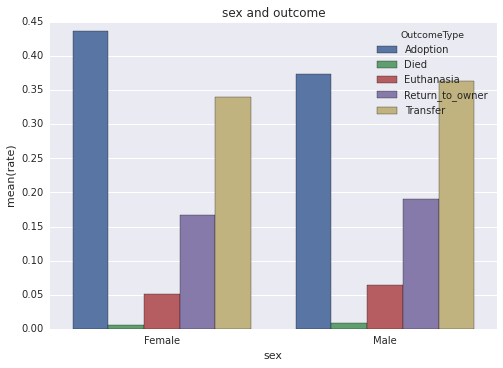

In [352]:
feature = 'sex'
plotdata = data[[feature,'OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby([feature,'OutcomeType']).count()
sumtype = {}
for i in plotdata.index.levels[0]:
    sumtype[i] = plotdata.loc[i]['count'].sum() 
l = []
for i in range(len(plotdata)):
    l.append(float(plotdata['count'][i])/sumtype[plotdata.reset_index([feature,'OutcomeType'])[feature][i]])
plotdata['rate'] = l
v = plotdata.reset_index(['OutcomeType',feature])
ax = sns.barplot(x=feature, y="rate", hue="OutcomeType", data=v)
ax.set_title('sex and outcome')
plt.savefig('sexcount.png')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


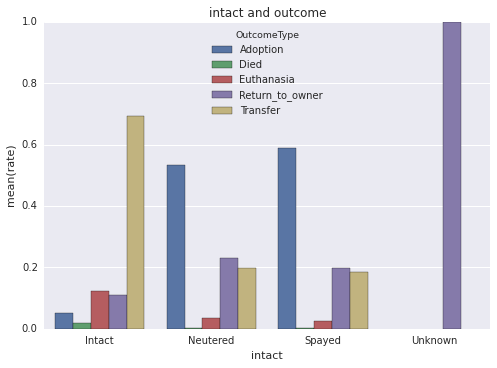

In [353]:
feature = 'intact'
plotdata = data[[feature,'OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby([feature,'OutcomeType']).count()
sumtype = {}
for i in plotdata.index.levels[0]:
    sumtype[i] = plotdata.loc[i]['count'].sum() 
l = []
for i in range(len(plotdata)):
    l.append(float(plotdata['count'][i])/sumtype[plotdata.reset_index([feature,'OutcomeType'])[feature][i]])
plotdata['rate'] = l
v = plotdata.reset_index(['OutcomeType',feature])
ax = sns.barplot(x=feature, y="rate", hue="OutcomeType", data=v)
ax.set_title('intact and outcome')
plt.savefig('intactcount.png')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


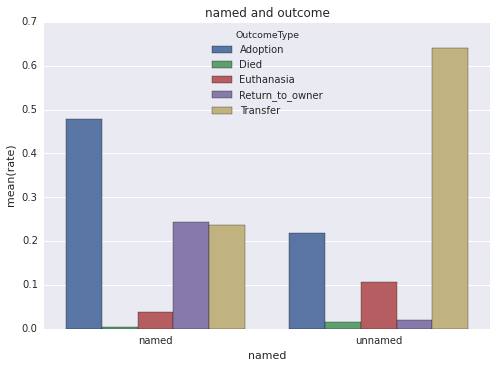

In [337]:
feature = 'named'
plotdata = data[[feature,'OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby([feature,'OutcomeType']).count()
sumtype = {}
for i in plotdata.index.levels[0]:
    sumtype[i] = plotdata.loc[i]['count'].sum() 
l = []
for i in range(len(plotdata)):
    l.append(float(plotdata['count'][i])/sumtype[plotdata.reset_index([feature,'OutcomeType'])[feature][i]])
plotdata['rate'] = l
v = plotdata.reset_index(['OutcomeType',feature])
ax = sns.barplot(x=feature, y="rate", hue="OutcomeType", data=v)
ax.set_title('named and outcome')
plt.savefig('namescount.png')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


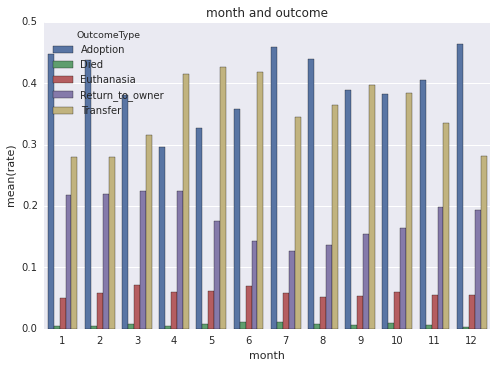

In [338]:
feature = 'month'
plotdata = data[[feature,'OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby([feature,'OutcomeType']).count()
sumtype = {}
for i in range(1,len(plotdata.unstack())+1):
    sumtype[i] = plotdata.loc[i].sum() 
l =[]
for i in range(len(plotdata)):
    l.append(float(list(plotdata['count'])[i])/sumtype[plotdata.reset_index([feature,'OutcomeType'])[feature][i]])
plotdata['rate'] = l
v = plotdata.reset_index(['OutcomeType',feature])
ax = sns.barplot(x=feature, y="rate", hue="OutcomeType", data=v)
ax.set_title('month and outcome')
plt.savefig('monthcount.png')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


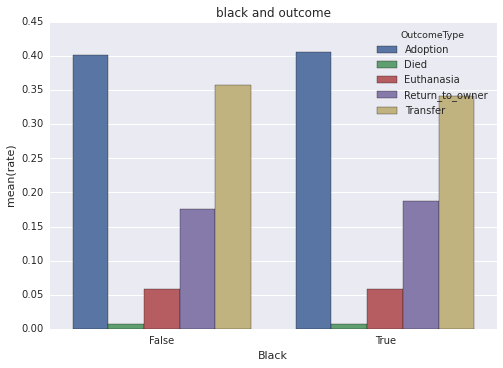

In [355]:
feature = 'Black'
plotdata = data[[feature,'OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby([feature,'OutcomeType']).count()
sumtype = {}
for i in plotdata.index.levels[0]:
    sumtype[i] = plotdata.loc[i]['count'].sum() 
l =[]
for i in range(len(plotdata)):
    l.append(float(list(plotdata['count'])[i])/sumtype[plotdata.reset_index([feature,'OutcomeType'])[feature][i]])
plotdata['rate'] = l
v = plotdata.reset_index(['OutcomeType',feature])
ax= sns.barplot(x=feature, y="rate", hue="OutcomeType", data=v)
ax.set_title('black and outcome')
plt.savefig('Blackcount.png')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


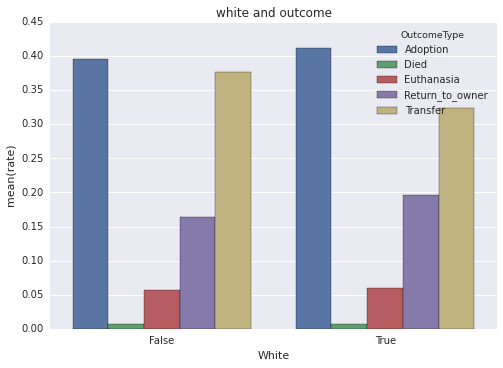

In [354]:
feature = 'White'
plotdata = data[[feature,'OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby([feature,'OutcomeType']).count()
sumtype = {}
for i in plotdata.index.levels[0]:
    sumtype[i] = plotdata.loc[i]['count'].sum() 
l =[]
for i in range(len(plotdata)):
    l.append(float(list(plotdata['count'])[i])/sumtype[plotdata.reset_index([feature,'OutcomeType'])[feature][i]])
plotdata['rate'] = l
v = plotdata.reset_index(['OutcomeType',feature])
ax = sns.barplot(x=feature, y="rate", hue="OutcomeType", data=v)
ax.set_title('white and outcome')
plt.savefig('whitecount.png')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


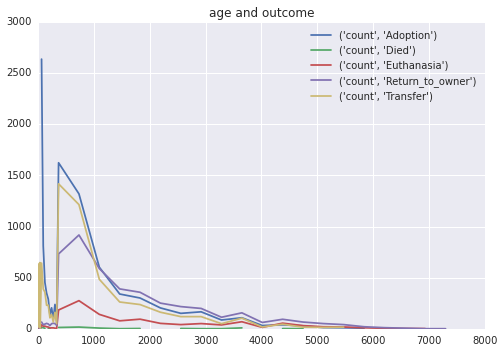

In [351]:
feature = 'age'
plotdata = data[[feature,'OutcomeType']]
plotdata['count'] = 1
plotdata = plotdata.groupby([feature,'OutcomeType']).count()
plt.plot(plotdata.unstack().index,plotdata.unstack())
plt.legend(plotdata.unstack())
plt.title('age and outcome')
plt.savefig('agepng')